In [ ]:
# Montar drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install rarfile

In [ ]:
# Extrair aquivo .rar
import rarfile
import os


# Caminho para o arquivo .rar
caminho_arquivo_rar = '/content/drive/MyDrive/dataset/Dataset_ok.rar'

# # Cria os diretórios de treinamento e teste se não existirem
# os.makedirs(os.path.join(root_dir, 'train'), exist_ok=True)

# Diretório de destino para a extração
diretorio_destino = '/content/visao'

# Extrair o arquivo .rar
with rarfile.RarFile(caminho_arquivo_rar, 'r') as arquivo_rar:
    arquivo_rar.extractall(diretorio_destino)

In [ ]:
# Caminho para a pasta montada do Google Drive
caminho_pasta = '/content/drive/MyDrive/dataset/Dataset/train/train'
caminho_dataset = '/content/visao'

def list_arquives(caminho):
  # Listar todos os arquivos na pasta
  arquivos_na_pasta = os.listdir(caminho)

  # Faz o controle do index das pastas
  index_pastas = 0

  # Armazena a quantidade total de imagens
  total_imagens = 0
  print("Caminho:",caminho)
  # Imprimir os nomes dos arquivos
  print("Arquivos na pasta:")
  for arquivo in arquivos_na_pasta:
      caminho_sub_pasta = caminho + '/' + arquivos_na_pasta[index_pastas]
      arquivos_sub_pasta = os.listdir(caminho_sub_pasta)
      quantidade_arq_sub_pasta = len(arquivos_sub_pasta)
      total_imagens += quantidade_arq_sub_pasta
      print(f"  {arquivo}:{quantidade_arq_sub_pasta}")
      index_pastas +=1
  print("Quantidade total de imagens:",total_imagens,"\n")
  return total_imagens

total_train = list_arquives(caminho_dataset+'/train')
total_valid = list_arquives(caminho_dataset+'/valid')
total_test = list_arquives(caminho_dataset+'/test')

total = total_train + total_valid + total_test

print(f"Treino Valid. Teste Total")
print(f"{total_train/total*100:.2f}% {total_valid/total*100:.2f}% {total_test/total*100:.2f}% {total}")

# # Se quiser listar também arquivos em subpastas, use glob
# # Lista todos os arquivos em todas as subpastas recursivamente
# todos_arquivos = glob.glob(caminho_dataset + '/**', recursive=True)
# arquivos_na_pasta = [arquivo for arquivo in todos_arquivos if os.path.isfile(arquivo)]

# # Imprimir os nomes dos arquivos
# print("\nArquivos na pasta (incluindo subpastas):")
# for arquivo in arquivos_na_pasta:
#     print(arquivo)

Caminho: /content/visao/train
Arquivos na pasta:
  pablo:200
  anabele:168
  diniz:202
  manuela:138
  michel:194
  matheus:225
  chris:196
Quantidade total de imagens: 1323 

Caminho: /content/visao/valid
Arquivos na pasta:
  pablo:56
  anabele:48
  diniz:56
  manuela:40
  michel:55
  matheus:46
  chris:44
Quantidade total de imagens: 345 

Caminho: /content/visao/test
Arquivos na pasta:
  pablo:28
  anabele:23
  diniz:25
  manuela:20
  michel:27
  matheus:19
  chris:24
Quantidade total de imagens: 166 

Treino Valid. Teste Total
72.14% 18.81% 9.05% 1834


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input

# ImageFile.LOAD_TRUNCATED_IMAGES = True

# Diretório do conjunto de dados
diretorio_train = caminho_dataset + "/train"
diretorio_valid = caminho_dataset + "/valid"

print(f"Diretorio de treino: {diretorio_train}")
print(f"Diretorio de validação {diretorio_valid}")

# # Lista de classes
# classes = os.listdir(diretorio_train)

# # Listas para armazenar caminhos para as imagens e rótulos correspondentes
# caminhos_imagens = []
# rotulos = []

# # Percorrer cada classe e coletar caminhos para as imagens e seus rótulos
# for classe in classes:
#     caminhos_classe = [os.path.join(diretorio_train, classe, arquivo) for arquivo in os.listdir(os.path.join(diretorio_train, classe))]
#     caminhos_imagens.extend(caminhos_classe)
#     rotulos.extend([classe] * len(caminhos_classe))

batch_size = 32

# Criar gerador de dados de treinamento e validação com aumento de dados
datagen = ImageDataGenerator(
    rescale=1./255,         # Normaliza os valores dos pixels para o intervalo [0, 1]
    # brightness_range=[0.5,1.1],
    # rotation_range=40,      # Rotaciona aleatoriamente as imagens até 40 graus
    # width_shift_range=0.2,  # Move horizontalmente as imagens aleatoriamente até 20% da largura
    # height_shift_range=0.2, # Move verticalmente as imagens aleatoriamente até 20% da altura
    # shear_range=0.2,        # Aplica shear transformation aleatória
    # zoom_range=0.2,         # Aplica zoom aleatório
    # horizontal_flip=True,   # Inverte aleatoriamente imagens horizontalmente
    # fill_mode='nearest',    # Preenche áreas fora da imagem após rotação ou translação
    # validation_split=0.2    # Define a fração de dados a ser usada para validação (20%)
)

# # Definir o preprocessamento dos dados
# datagen = ImageDataGenerator(preprocessing_function=preprocess_input)


# Carregar e pré-processar os dados de treinamento e validação
train_generator = datagen.flow_from_directory(
    diretorio_train,
    target_size=(224, 224),  # Redimensiona as imagens para 224x224 pixels
    batch_size=batch_size,   # Tamanho do lote
    class_mode='categorical',# Modo de classificação categórica
    # subset='training'        # Define que este é o conjunto de treinamento
)

validation_generator = datagen.flow_from_directory(
    diretorio_valid,
    target_size=(224, 224),  # Redimensiona as imagens para 224x224 pixels
    batch_size=batch_size,   # Tamanho do lote
    class_mode='categorical',# Modo de classificação categórica
    # subset='validation'      # Define que este é o conjunto de validação
)



Diretorio de treino: /content/visao/train
Diretorio de validação /content/visao/valid
Found 1323 images belonging to 7 classes.
Found 345 images belonging to 7 classes.


In [ ]:
!pip install livelossplot
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, Dense
from PIL import ImageFile
import numpy as np
import pandas as pd
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from livelossplot import PlotLossesKeras

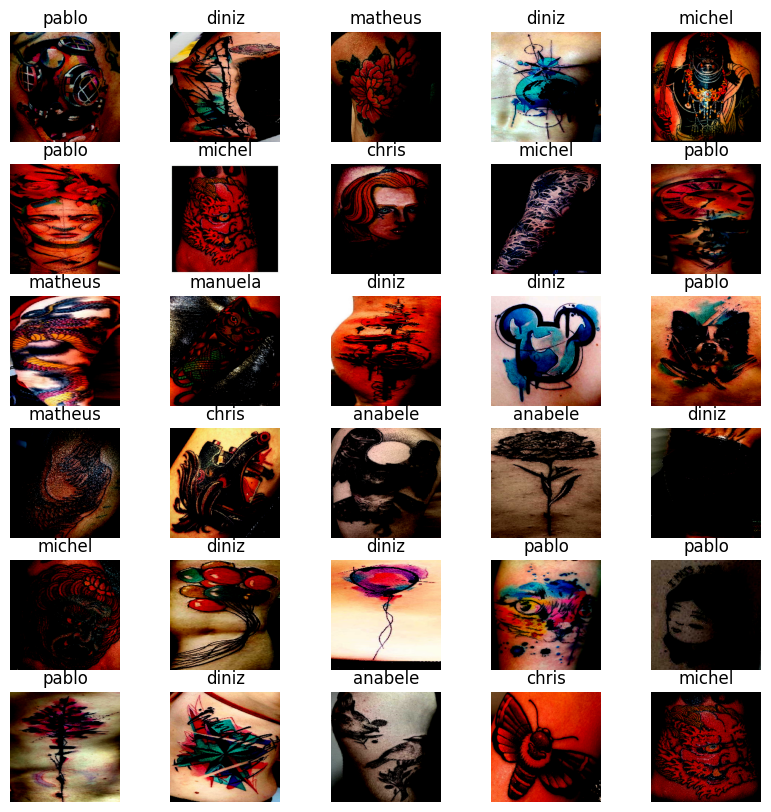

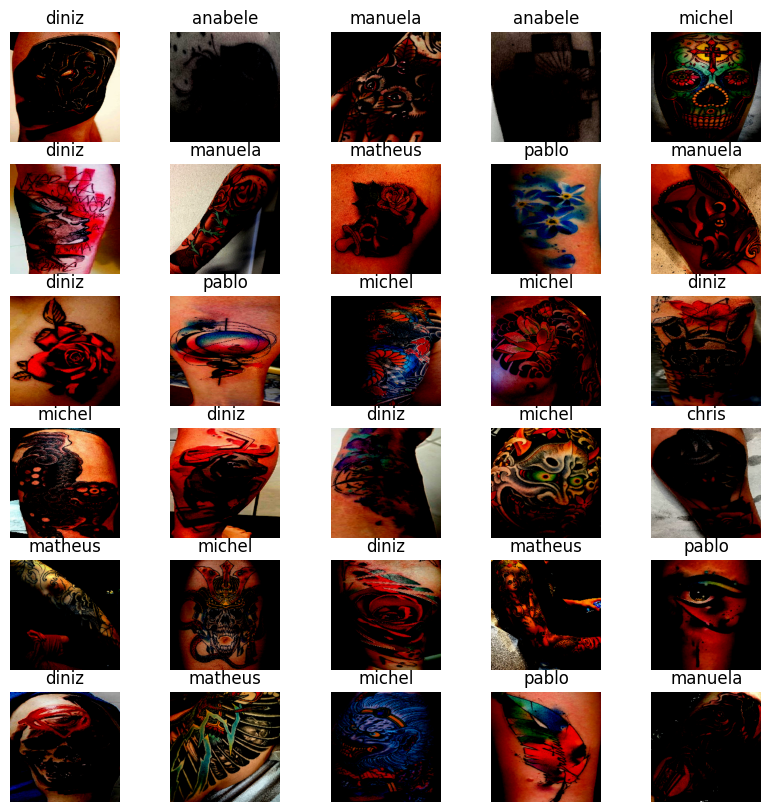

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Converter as chaves do dicionário de rótulos em uma lista
class_names = list(train_generator.class_indices.keys())

# Visualização de algumas imagens do conjunto de treinamento
plt.figure(figsize=(10, 10))
for imagens, rotulos in train_generator:
    for i in range(30):
        #          L x C
        plt.subplot(6, 5, i + 1)
        plt.imshow(imagens[i])
        if isinstance(rotulos[i], np.ndarray):  # Se os rótulos forem números inteiros
            plt.title(class_names[np.argmax(rotulos[i])])  # Mapear o índice do rótulo para o nome da classe
        else:
            plt.title(rotulos[i])  # Usar diretamente o rótulo como título
        plt.axis("off")
    break  # Para visualizar apenas um lote de imagens
plt.show()

# Converter as chaves do dicionário de rótulos em uma lista
class_names = list(validation_generator.class_indices.keys())

# Visualização de algumas imagens do conjunto de treinamento
plt.figure(figsize=(10, 10))
for imagens, rotulos in validation_generator:
    for i in range(30):
        plt.subplot(6, 5, i + 1)
        plt.imshow(imagens[i])
        if isinstance(rotulos[i], np.ndarray):  # Se os rótulos forem números inteiros
            plt.title(class_names[np.argmax(rotulos[i])])  # Mapear o índice do rótulo para o nome da classe
        else:
            plt.title(rotulos[i])  # Usar diretamente o rótulo como título
        plt.axis("off")
    break  # Para visualizar apenas um lote de imagens
plt.show()

In [ ]:
# Converter as chaves do dicionário de rótulos em uma lista
classes = list(train_generator.class_indices.keys())
print(classes)

['anabele', 'chris', 'diniz', 'manuela', 'matheus', 'michel', 'pablo']


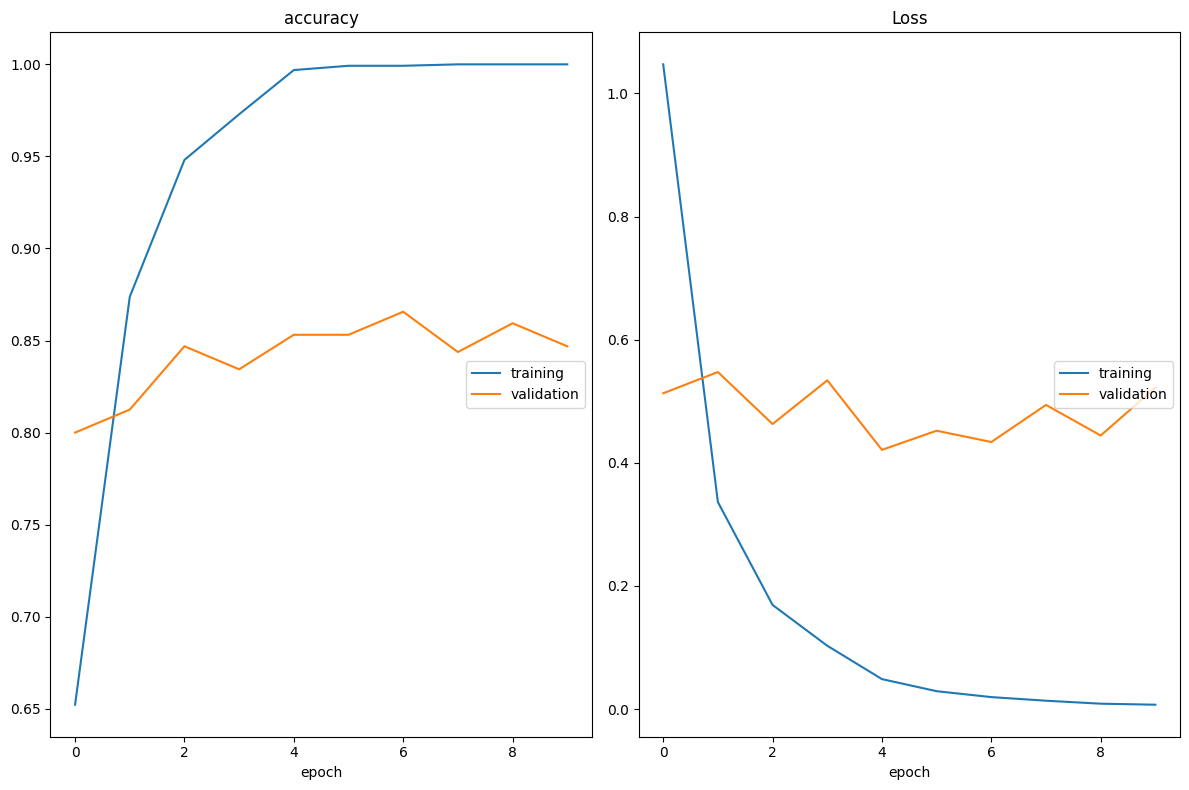

accuracy
	training         	 (min:    0.652, max:    1.000, cur:    1.000)
	validation       	 (min:    0.800, max:    0.866, cur:    0.847)
Loss
	training         	 (min:    0.007, max:    1.047, cur:    0.007)
	validation       	 (min:    0.421, max:    0.547, cur:    0.522)
41/41 [==============================] - 10s 256ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.5220 - val_accuracy: 0.8469


In [ ]:
from keras.optimizers import Adam
from keras.optimizers import SGD


# Carregar o modelo MobileNet pré-treinado (sem incluir as camadas densas no topo)
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Adicionar camadas adicionais no topo do modelo
x = base_model.output
# Adiciona uma camada de Global Average Pooling para reduzir a dimensionalidade dos recursos
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(classes), activation='softmax')(x)

# Definir o modelo final
model = Model(inputs=base_model.input, outputs=predictions)

# Congelar as camadas base (MobileNet)
for layer in base_model.layers:
    layer.trainable = False

#batch_size
#optimizer
#regularizacao
epochs = 10
learning_rate = 0.01
optimizer = Adam(learning_rate=learning_rate)


# Compilar o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Saves Keras model after each epoch whith data augmentation
# checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/tattoo_1.weights.hdf5',
#                                verbose=1,
#                                save_best_only=True)

# Saves Keras model after each epoch whith data augmentation e preprocess_input
# checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/tattoo_2.weights.hdf5',
#                                verbose=1,
#                                save_best_only=True)

# # Saves Keras model after each epoch without data augmentation
# checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/tattoo_3.weights.hdf5',
#                                verbose=1,
#                                save_best_only=True)

# # Saves Keras model after each epoch with data augmentation + brightness
# checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/tattoo_4.weights.hdf5',
#                                verbose=1,
#                                save_best_only=True)

# # Saves Keras model after each epoch with data augmentation without brightness
# checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/tattoo_5.weights.hdf5',
#                                verbose=1,
#                                save_best_only=True)

# # Saves Keras model after each epoch with data augmentation without brightness bath_size=32 learning_rate=0.001
# checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/tattoo_6.weights.hdf5',
#                                verbose=1,
#                                save_best_only=True)

# # Saves Keras model after each epoch with data augmentation without brightness bath_size=32 learning_rate=0.01
# checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/tattoo_7.weights.hdf5',
#                                verbose=1,
#                                save_best_only=True)

# # Saves Keras model after each epoch with data augmentation without brightness bath_size=32 learning_rate=0.01
# checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/tattoo_9.weights.hdf5',
#                                verbose=1,
#                                save_best_only=True)

# # Saves Keras model after each epoch with data augmentation with preprocess_input
# checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/tattoo_10.weights.hdf5',
#                                verbose=1,
#                                save_best_only=True)

# # Saves Keras model after each epoch with data augmentation with preprocess_input 512 neuronios topo
# checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/tattoo_11.weights.hdf5',
#                                verbose=1,
#                                save_best_only=True)

# # Saves Keras model after each epoch with data augmentation 512 neuronios topo
# checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/tattoo_12.weights.hdf5',
#                                verbose=1,
#                                save_best_only=True)

# # Saves Keras model after each epoch without data augmentation 512 neuronios topo
# checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/tattoo_13.weights.hdf5',
#                                verbose=1,
#                                save_best_only=True)

# Saves Keras model after each epoch without data augmentation 1024 neuronios topo
checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/tattoo_14.weights.hdf5',
                               verbose=1,
                               save_best_only=True)
# Número de passos por época
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = validation_generator.samples // validation_generator.batch_size

# Treinar o modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[checkpointer, PlotLossesKeras()],
)



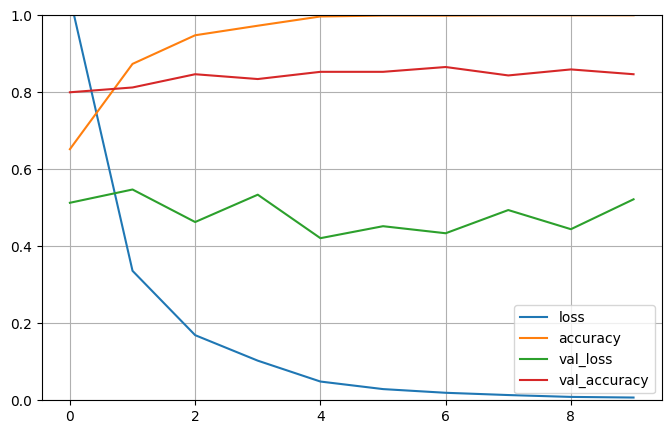

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

## Keras Tuner

In [ ]:
pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.9 MB/s eta 0:00:00


In [ ]:
# Diretório do conjunto de dados
diretorio_test = caminho_dataset + "/test"

print(f"Diretorio de teste {diretorio_test}")

test_generator = ImageDataGenerator(
      rescale=1./255,         # Normaliza os valores dos pixels para o intervalo [0, 1]
    )

# # Definir o preprocessamento dos dados
# test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)


testgen = test_generator.flow_from_directory(
    diretorio_test,
    target_size=(224, 224),  # Redimensiona as imagens para 224x224 pixels
    batch_size=1,
    #  class_mode=None,
    class_mode='categorical',# Modo de classificação categórica
    #  classes=class_subset,
    shuffle=False
    #  seed=42
    )

Diretorio de teste /content/visao/test
Found 166 images belonging to 7 classes.


In [ ]:
from keras.models import load_model

scratch_model = load_model('/content/drive/MyDrive/tattoo_10.weights.hdf5')

scratch_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128 

In [ ]:
# model.load_weights('/content/drive/MyDrive/tattoo_1.weights.hdf5')
# model.load_weights('/content/drive/MyDrive/tattoo_3.weights.hdf5')
model.load_weights('/content/drive/MyDrive/tattoo_4.weights.hdf5')



In [ ]:
# Avaliar o modelo treinado com o conjunto de teste
resultados = model.evaluate(testgen)

# Exibir os resultados
print("Loss do conjunto de teste:", resultados[0])
print("Acurácia do conjunto de teste:", resultados[1])


166/166 [==============================] - 2s 8ms/step - loss: 0.3720 - accuracy: 0.8675
Loss do conjunto de teste: 0.37200018763542175
Acurácia do conjunto de teste: 0.8674699068069458


In [ ]:
# Avaliar o modelo treinado com o conjunto de teste
resultados = best_model.evaluate(testgen)

# Exibir os resultados
print("Loss do conjunto de teste:", resultados[0])
print("Acurácia do conjunto de teste:", resultados[1])

258/258 [==============================] - 4s 10ms/step - loss: 0.5344 - accuracy: 0.7829
Loss do conjunto de teste: 0.5343896746635437
Acurácia do conjunto de teste: 0.7829457521438599


In [ ]:
# model = best_model
predicted_classes = np.argmax(model.predict(testgen), axis=-1)

class_indices = train_generator.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())
true_classes = testgen.classes

166/166 [==============================] - 3s 18ms/step


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

def display_results(y_true, y_preds, class_labels):

    results = pd.DataFrame(precision_recall_fscore_support(y_true, y_preds),
                          columns=class_labels).T

    results.rename(columns={0: 'Precision', 1: 'Recall',
                            2: 'F-Score', 3: 'Support'}, inplace=True)

    results.sort_values(by='F-Score', ascending=False, inplace=True)
    global_acc = accuracy_score(y_true, y_preds)

    print("Overall Categorical Accuracy: {:.2f}%".format(global_acc*100))
    return results

In [ ]:
display_results(true_classes, predicted_classes, class_indices.values())

Overall Categorical Accuracy: 86.14%


,Precision,Recall,F-Score,Support
diniz,0.892857,1.000000,0.943396,25.0
anabele,0.954545,0.913043,0.933333,23.0
manuela,0.900000,0.900000,0.900000,20.0
pablo,0.958333,0.821429,0.884615,28.0
chris,0.833333,0.833333,0.833333,24.0
matheus,0.692308,0.947368,0.800000,19.0
michel,0.818182,0.666667,0.734694,27.0


In [ ]:

from keras.preprocessing import image

# # Lista de classes
# classes = os.listdir('/content/drive/MyDrive/dataset/Dataset/train/test/')

# Converter as chaves do dicionário de rótulos em uma lista
classes = list(train_generator.class_indices.keys())

# Carregue a imagem
img_path = '/content/drive/MyDrive/dataset/Dataset/train/test/chris/chris (103).jpg'
img_path = '/content/drive/MyDrive/dataset/Dataset/train/test/chris/chris (111).jpg'
img_path = '/content/drive/MyDrive/dataset/Dataset/train/test/diniz/diniz (101).jpg'

img = image.load_img(img_path, target_size=(224, 224))

# Converta a imagem para um array numpy
img_array = image.img_to_array(img)

# Expanda as dimensões da imagem para corresponder ao formato de entrada esperado pela MobileNet
img_array = np.expand_dims(img_array, axis=0)

# Pré-processamento da imagem
img_preprocessed = preprocess_input(img_array)

# Fazer a predição usando o modelo treinado
predicoes = model.predict(img_array)

# Exibir as predições
print(classes)
print(predicoes.round(3))
print(f"Predições para a imagen:{classes[np.argmax(predicoes)]}")
# predicoes = np.argmax(predicoes)


1/1 [==============================] - 1s 580ms/step
['anabele', 'chris', 'diniz', 'manuela', 'matheus', 'michel', 'pablo']
[[0.003 0.021 0.908 0.022 0.011 0.002 0.032]]
Predições para a imagen:diniz


### Treinamento 1

#### Com data augmentation
#### Pesos:'/content/drive/MyDrive/tattoo_9.weights.hdf5'
#### 1024 neuronios no topo

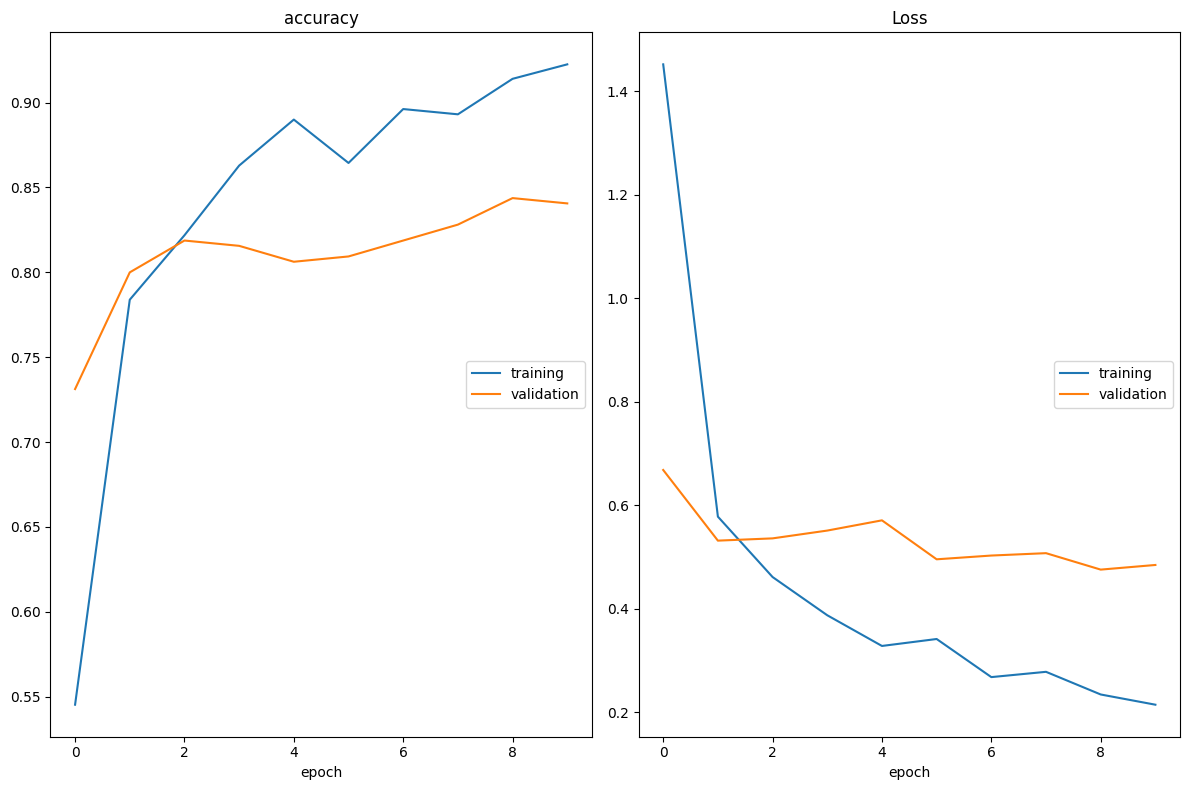

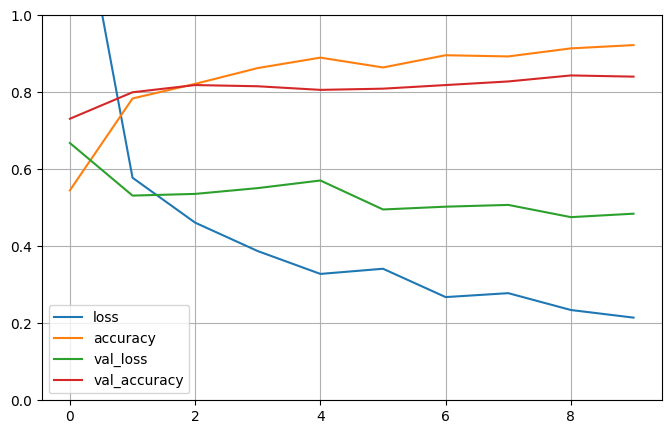

In [ ]:
display_results(true_classes, predicted_classes, class_indices.values())


Overall Categorical Accuracy: 87.95%


,Precision,Recall,F-Score,Support
diniz,0.925926,1.000000,0.961538,25.0
anabele,0.954545,0.913043,0.933333,23.0
pablo,1.000000,0.821429,0.901961,28.0
manuela,0.791667,0.950000,0.863636,20.0
matheus,0.937500,0.789474,0.857143,19.0
michel,0.800000,0.888889,0.842105,27.0
chris,0.791667,0.791667,0.791667,24.0


### Treinamento 2

#### Com preprocess_input
#### Pesos:'/content/drive/MyDrive/tattoo_10.weights.hdf5'
#### 1024 neuronios no topo

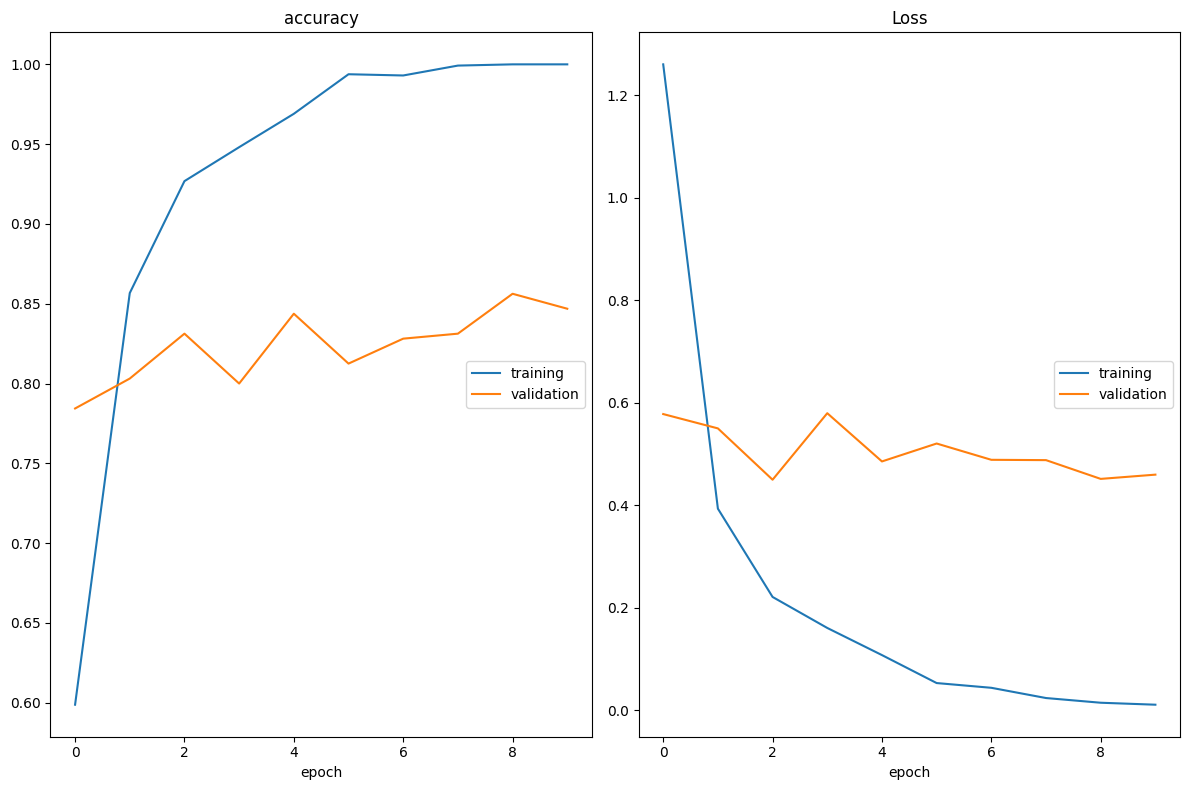

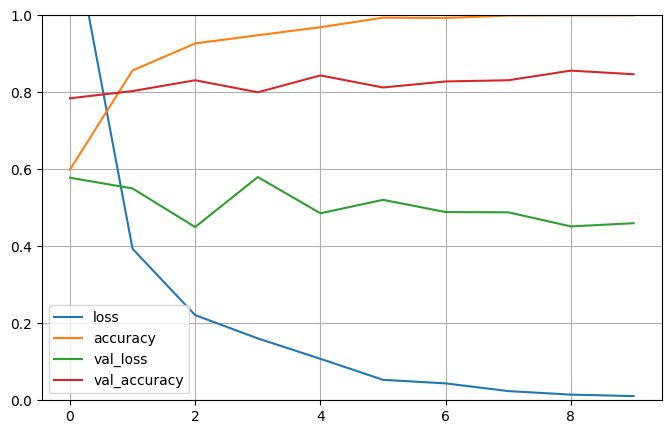

In [ ]:
display_results(true_classes, predicted_classes, class_indices.values())

Overall Categorical Accuracy: 86.75%


,Precision,Recall,F-Score,Support
diniz,1.000000,0.960000,0.979592,25.0
pablo,0.964286,0.964286,0.964286,28.0
anabele,0.956522,0.956522,0.956522,23.0
michel,0.846154,0.814815,0.830189,27.0
matheus,0.772727,0.894737,0.829268,19.0
manuela,0.866667,0.650000,0.742857,20.0
chris,0.678571,0.791667,0.730769,24.0


### Treinamento 3

#### Com preprocess_input
#### Pesos:'/content/drive/MyDrive/tattoo_11.weights.hdf5'
#### 512 neuronios no topo

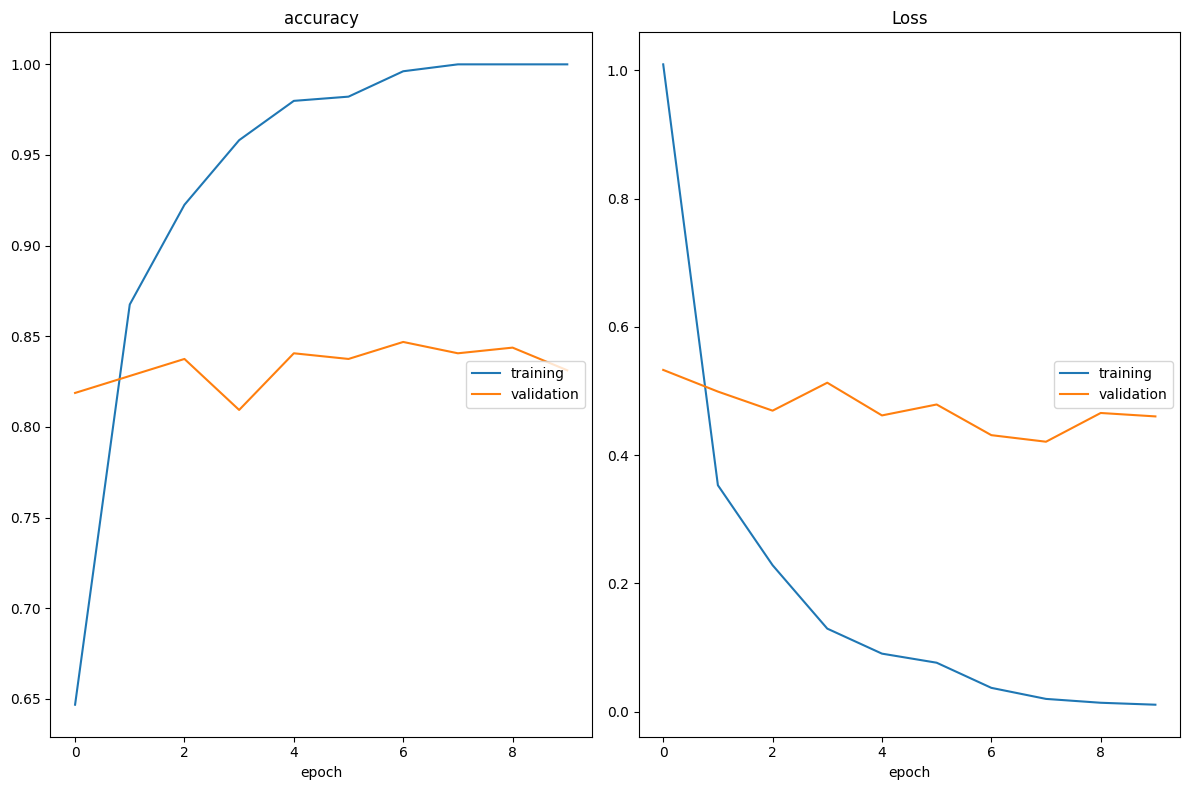

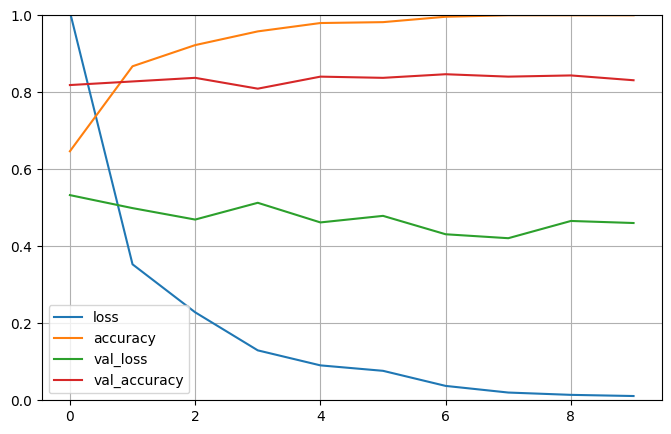

In [ ]:
display_results(true_classes, predicted_classes, class_indices.values())

Overall Categorical Accuracy: 86.75%


,Precision,Recall,F-Score,Support
diniz,1.000000,0.960000,0.979592,25.0
pablo,0.964286,0.964286,0.964286,28.0
anabele,0.956522,0.956522,0.956522,23.0
matheus,0.809524,0.894737,0.850000,19.0
michel,0.821429,0.851852,0.836364,27.0
chris,0.703704,0.791667,0.745098,24.0
manuela,0.800000,0.600000,0.685714,20.0


### Treinamento 4

#### Com data augmentation
#### Pesos:'/content/drive/MyDrive/tattoo_12.weights.hdf5'
#### 512 neuronios no topo

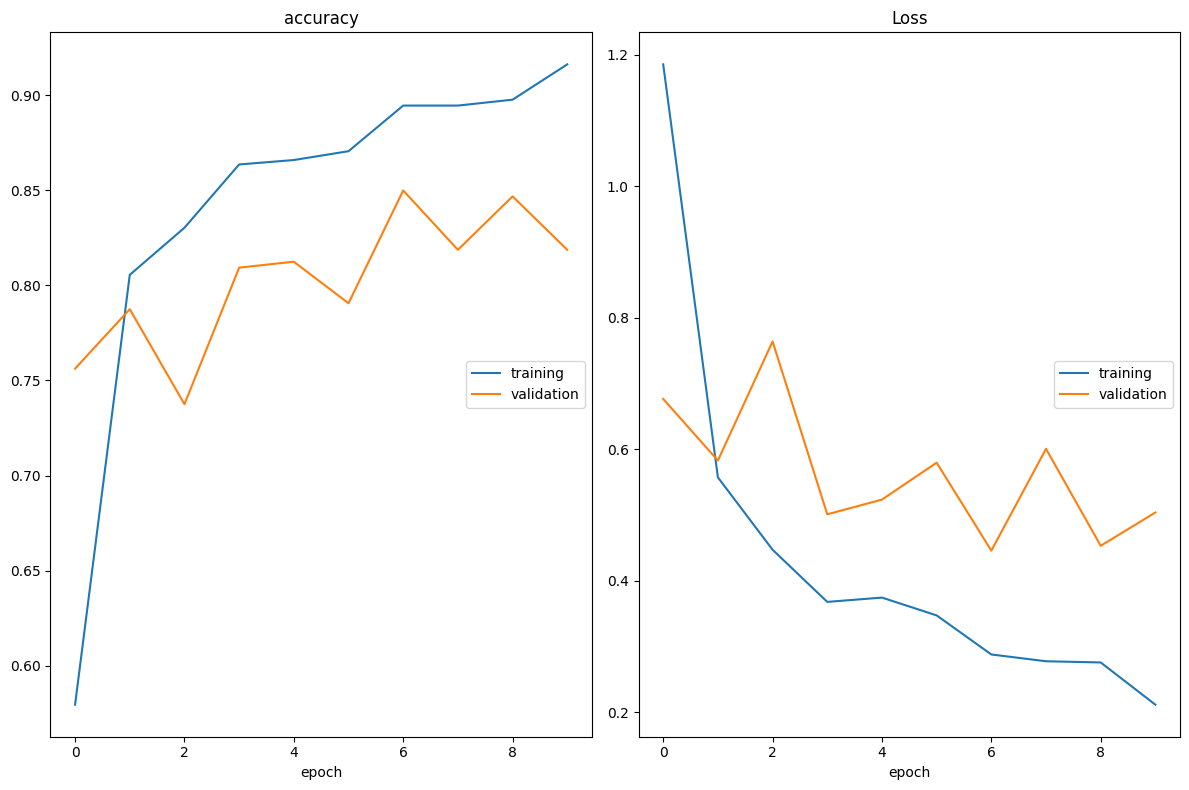

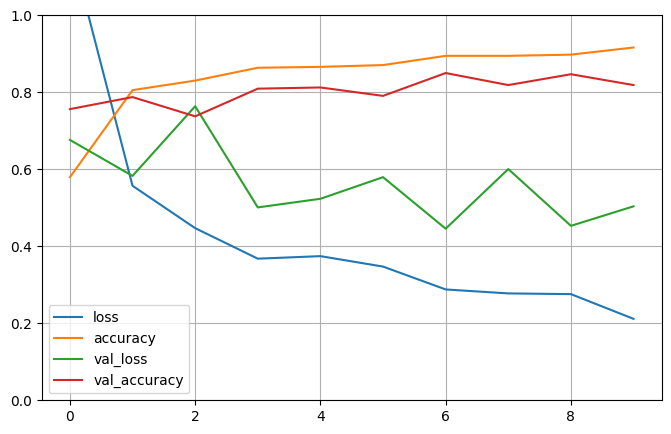

In [ ]:
display_results(true_classes, predicted_classes, class_indices.values())

Overall Categorical Accuracy: 83.73%


,Precision,Recall,F-Score,Support
anabele,0.956522,0.956522,0.956522,23.0
diniz,0.958333,0.920000,0.938776,25.0
pablo,0.923077,0.857143,0.888889,28.0
manuela,0.782609,0.900000,0.837209,20.0
matheus,0.727273,0.842105,0.780488,19.0
chris,0.689655,0.833333,0.754717,24.0
michel,0.842105,0.592593,0.695652,27.0


### Treinamento 5
####sem data augmentation
####Pesos:'/content/drive/MyDrive/tattoo_13.weights.hdf5'
####512 neuronios no topo

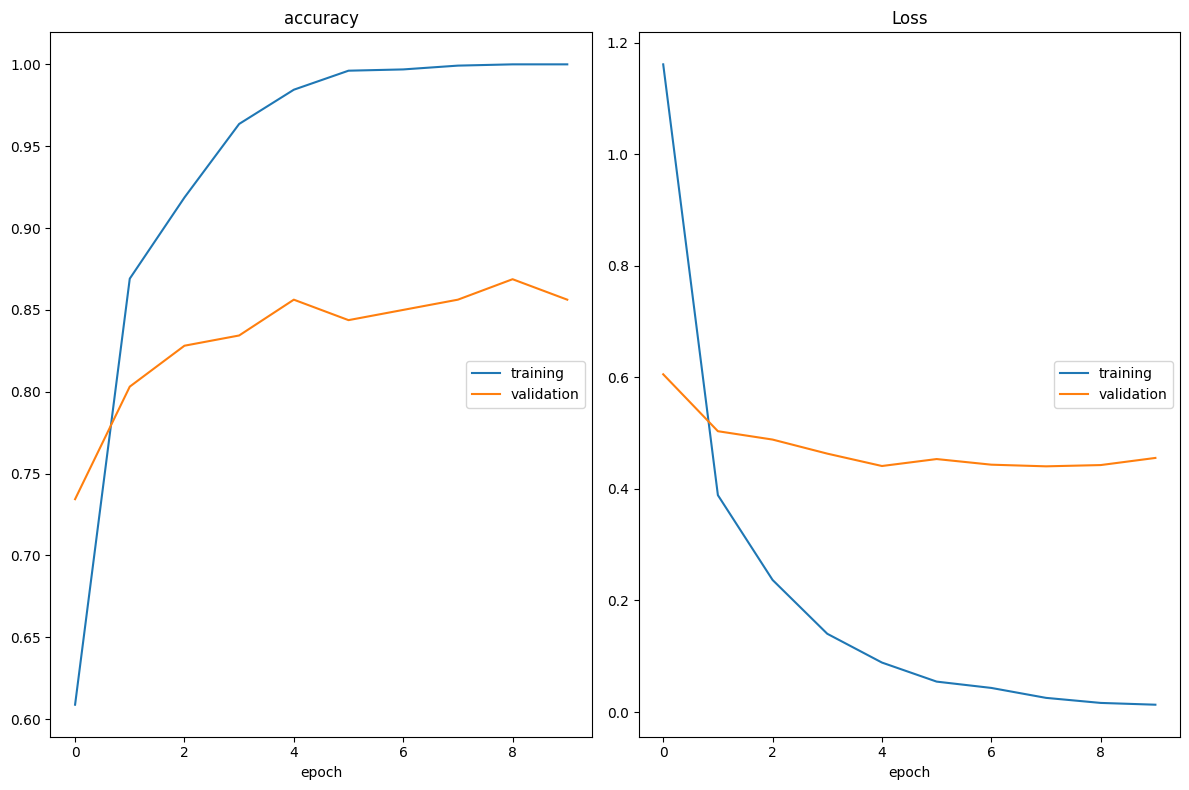

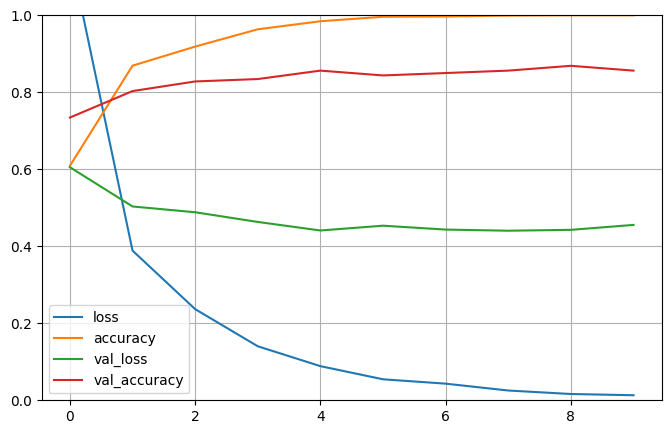

In [ ]:
display_results(true_classes, predicted_classes, class_indices.values())

Overall Categorical Accuracy: 87.95%


,Precision,Recall,F-Score,Support
diniz,0.925926,1.000000,0.961538,25.0
anabele,0.956522,0.956522,0.956522,23.0
pablo,1.000000,0.892857,0.943396,28.0
matheus,0.782609,0.947368,0.857143,19.0
manuela,0.842105,0.800000,0.820513,20.0
chris,0.769231,0.833333,0.800000,24.0
michel,0.869565,0.740741,0.800000,27.0


### Treinamento 6
####sem data augmentation
####Pesos:'/content/drive/MyDrive/tattoo_14.weights.hdf5'
####1024 neuronios no topo

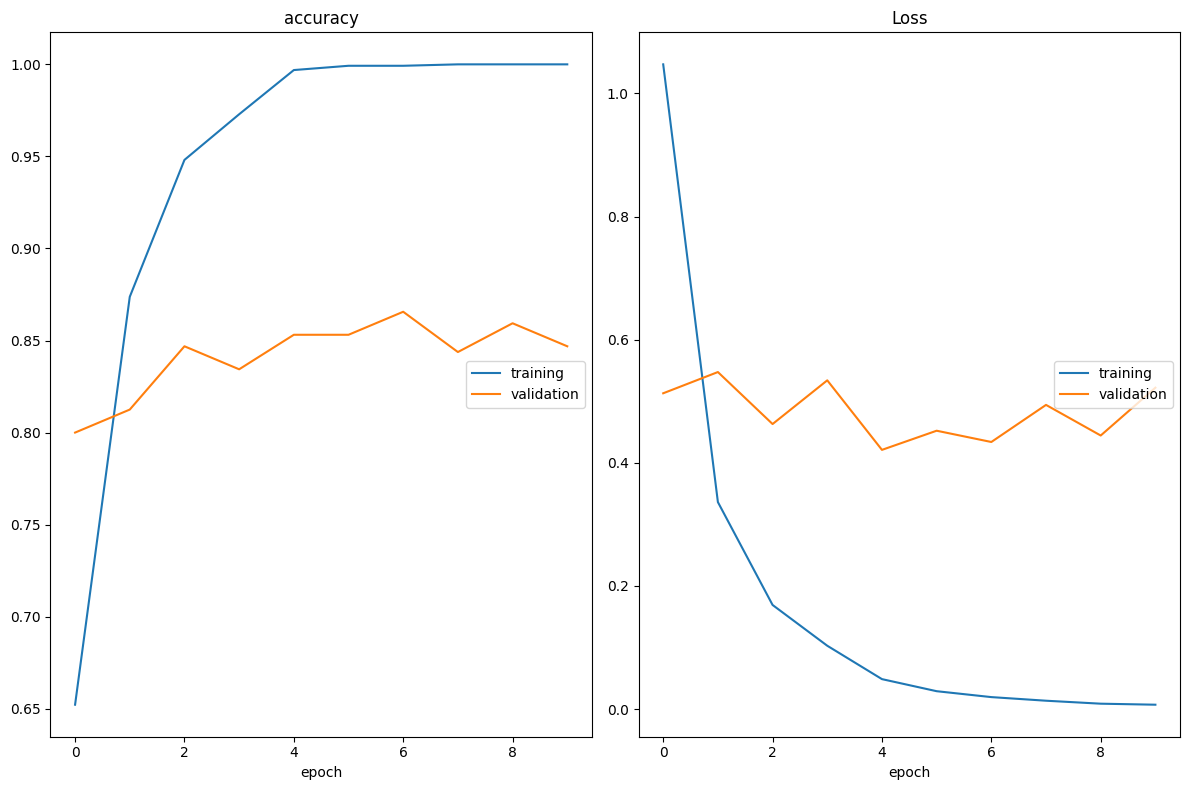

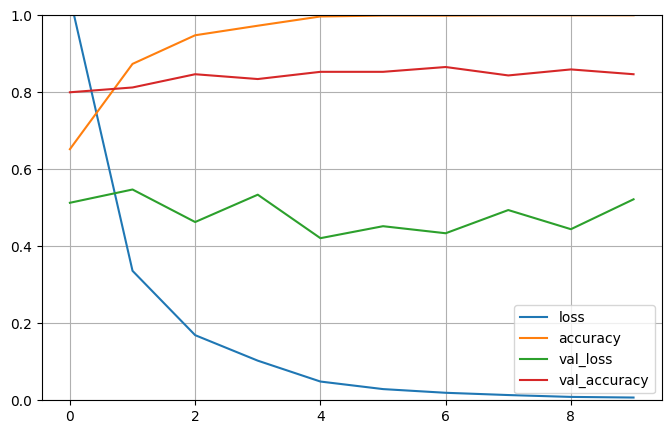

In [ ]:
display_results(true_classes, predicted_classes, class_indices.values())

Overall Categorical Accuracy: 86.14%


,Precision,Recall,F-Score,Support
diniz,0.892857,1.000000,0.943396,25.0
anabele,0.954545,0.913043,0.933333,23.0
manuela,0.900000,0.900000,0.900000,20.0
pablo,0.958333,0.821429,0.884615,28.0
chris,0.833333,0.833333,0.833333,24.0
matheus,0.692308,0.947368,0.800000,19.0
michel,0.818182,0.666667,0.734694,27.0
